In [77]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('/Users/aagar19/km_analysis.csv')

In [ ]:
df

In [79]:
from lifelines import NelsonAalenFitter


In [80]:
naf = NelsonAalenFitter()


In [81]:
df

,event,range,time1
0,0,C,87
1,1,B,65
2,1,B,41
3,1,C,52
4,0,B,84
...,...,...,...
511,1,A,63
512,1,A,81
513,1,A,66
514,1,A,74


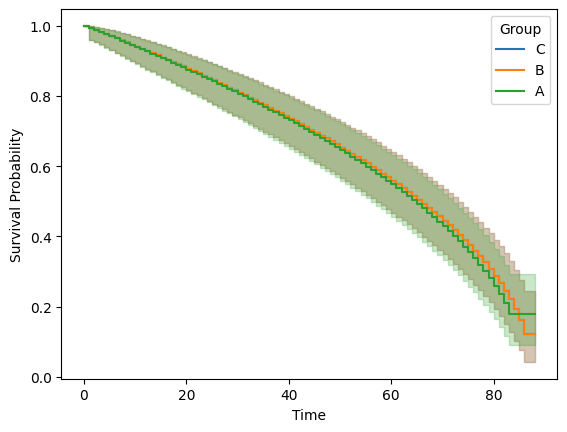

In [85]:
for group in groups:
    group_data = df[df['range'] == group]
    kmf.fit(group_data['time1'],group_data['event'],label=group)
    kmf.plot()
    plt.legend(title = 'Group')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from lifelines import *

fig, axes = plt.subplots(3, 3, figsize=(13.5, 7.5))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
ggf = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')
sf = SplineFitter(np.percentile(T.loc[E.astype(bool)], [0, 50, 100])).fit(T, E, label='SplineFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
ggf.plot_survival_function(ax=axes[2][0])
sf.plot_survival_function(ax=axes[2][1])

In [44]:
groups = df['range'].unique()

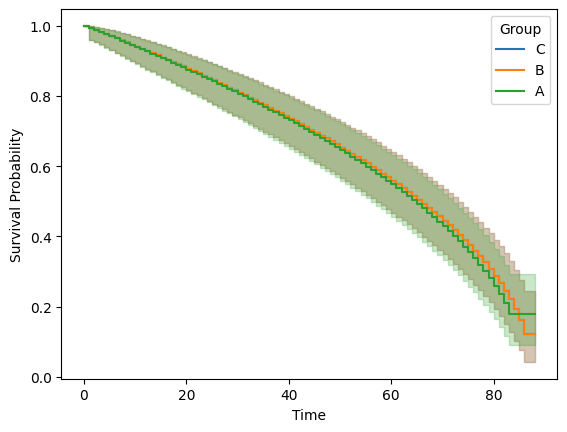

In [45]:
for group in groups:
    group_data = df[df['range'] == group]
    kmf.fit(group_data['time1'],group_data['event'],label=group)
    kmf.plot()
    plt.legend(title = 'Group')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')

In [84]:
kmf.survival_function_.plot()
plt.title('Survival function')


AttributeError: 'KaplanMeierFitter' object has no attribute 'survival_function_'

<Axes: xlabel='timeline'>

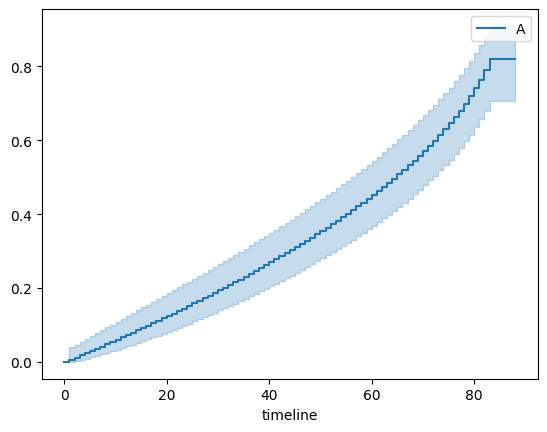

In [86]:
kmf.plot_cumulative_density()


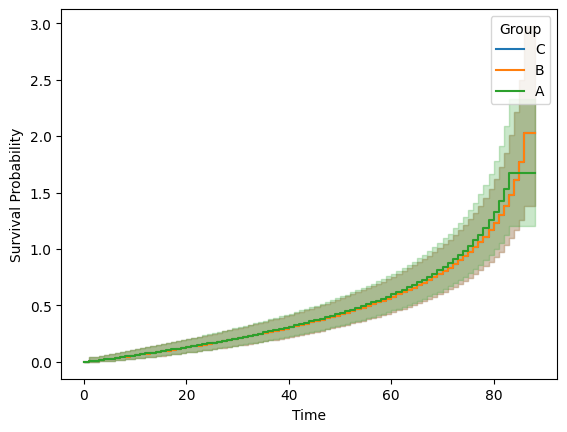

In [54]:
for group in groups:
    group_data = df[df['range'] == group]
    naf.fit(group_data['time1'],group_data['event'],label=group)
    naf.plot()
    plt.legend(title = 'Group')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')

In [56]:
naf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,170,170
1.0,1,1,0,0,170
2.0,2,1,1,0,169
3.0,2,1,1,0,167
4.0,2,1,1,0,165
...,...,...,...,...,...
84.0,1,0,1,0,5
85.0,1,0,1,0,4
86.0,1,0,1,0,3


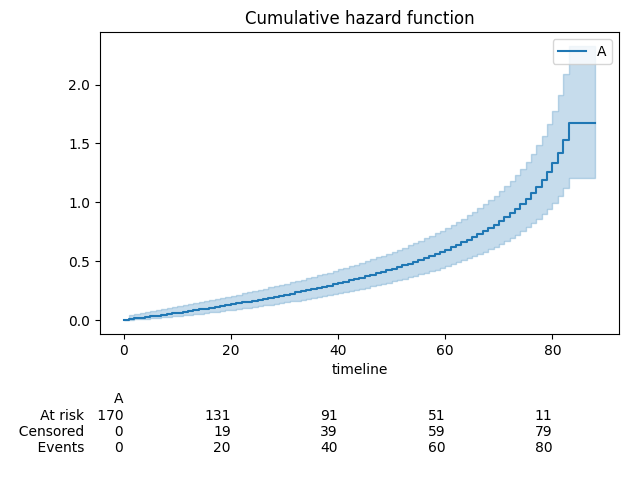

In [53]:
T = df['time1']
E = df['range']

naf = NelsonAalenFitter()
naf.fit(group_data['time1'],group_data['event'],label=group)

naf.plot(at_risk_counts=True)
plt.title('Cumulative hazard function');

In [76]:
T = df["range"]
B = df["event"]
plt.hist(T , bins = 100)
plt.show()

KeyError: 'range'

In [70]:
from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

65.0
     A_lower_0.95  A_upper_0.95
0.5          56.0          72.0


In [71]:
from lifelines.datasets import load_rossi


In [72]:
rossi = load_rossi()


In [73]:
from lifelines import CoxPHFitter

df = pd.DataFrame({
    'T': [5, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'E': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    'month': [10, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'age': [4, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'id': [1, 1, 1, 1, 2, 3, 3, 4, 4, 5, 6, 7]
})

In [74]:
cph = CoxPHFitter()
cph.fit(df, 'T', 'E', cluster_col='id')
cph.print_summary()

TypeError: NDFrame.describe() got an unexpected keyword argument 'datetime_is_numeric'

In [87]:
from lifelines.datasets import load_waltons


In [88]:
df = load_waltons() # returns a Pandas DataFrame


In [89]:
print(df.head())


      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


In [90]:
T = df['T']
E = df['E']

In [91]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E) 

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 163 total observations, 7 right-censored observations>

<Axes: xlabel='timeline'>

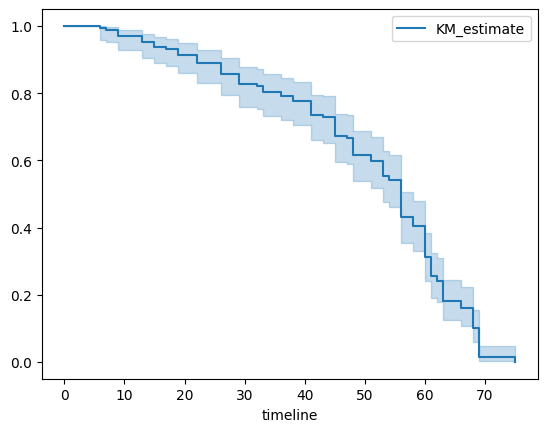

In [92]:
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

<Axes: xlabel='timeline'>

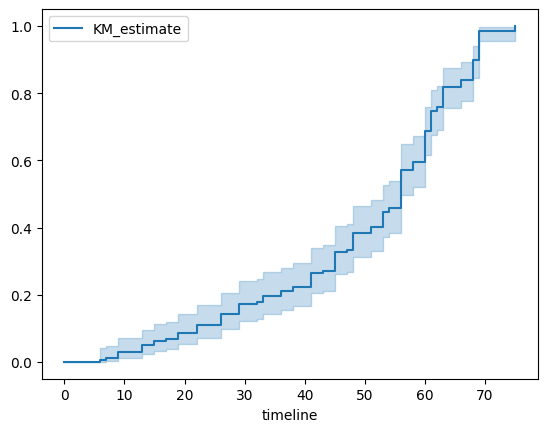

In [93]:
kmf.plot_cumulative_density()


In [94]:
kmf.fit(T, E, timeline=range(0, 100, 2))


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 163 total observations, 7 right-censored observations>

In [95]:
from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

<Axes: >

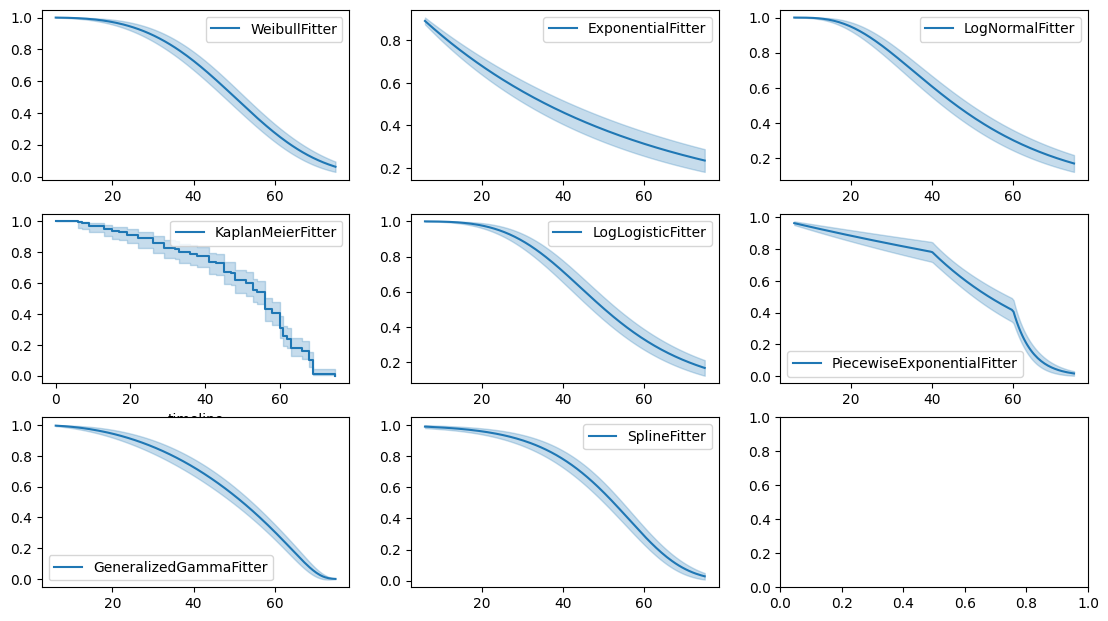

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from lifelines import *

fig, axes = plt.subplots(3, 3, figsize=(13.5, 7.5))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
ggf = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')
sf = SplineFitter(np.percentile(T.loc[E.astype(bool)], [0, 50, 100])).fit(T, E, label='SplineFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
ggf.plot_survival_function(ax=axes[2][0])
sf.plot_survival_function(ax=axes[2][1])

In [ ]:
for group in groups:
    group_data = df[df['range'] == group]
    kmf.fit(group_data['time1'],group_data['event'],label=group)
    kmf.plot()
    plt.legend(title = 'Group')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')

In [97]:
df = pd.read_csv('/Users/aagar19/km_analysis.csv')

In [98]:
T = df['time1']
E = df['event']